<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 할일
* Customer Analysis
* Iterator

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import plotnine as gg
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from collections import defaultdict
from functools import reduce

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales_data_with_stores.csv',
 'sales.csv',
 '1_orders_dataset.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'test.csv',
 'mock_sales_data.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'ecommerce-data.csv',
 '1_order_payments_dataset.csv',
 'sample-sales-data.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [6]:
df = pd.read_csv('groceries.csv')
df.sales_date = df.sales_date.to_numpy().astype('datetime64[D]')
df.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg


In [14]:
df.iloc[:,0:3].value_counts().reset_index().sort_values(['product_code', 'product_description'])

,product_code,product_description,product_group,0
0,1001,tomato,vegetable,30
1,1002,cucumber,vegetable,30
2,1003,onion,vegetable,30
3,1101,plum,fruit,30
4,1102,orange,fruit,30
5,1103,apple,fruit,30
6,1104,grape,fruit,30
7,1201,milk-1.5,dairy,30
8,1202,yogurt-1,dairy,30
9,1203,butter-0.25,dairy,30


In [21]:
df.columns = [re.sub('product_|sales_', '', a) for a in df.columns]
df['rev'] = df.price * df.quantity
df.head()

,code,description,group,date,price,quantity,unit,rev
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,107.64
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,68.77
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,101.66
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,68.77
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,101.66


In [18]:
print(df['date'].max())
print(df['date'].min())

2021-11-30 00:00:00
2021-11-01 00:00:00


In [24]:
cnt = df.groupby(['group','description','date'])['quantity', 'rev'].sum().reset_index()
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,group,description,date,quantity,rev
0,dairy,butter-0.25,2021-11-01,22,261.8
1,dairy,butter-0.25,2021-11-02,34,404.6
2,dairy,butter-0.25,2021-11-03,26,309.4
3,dairy,butter-0.25,2021-11-04,39,464.1
4,dairy,butter-0.25,2021-11-05,27,321.3


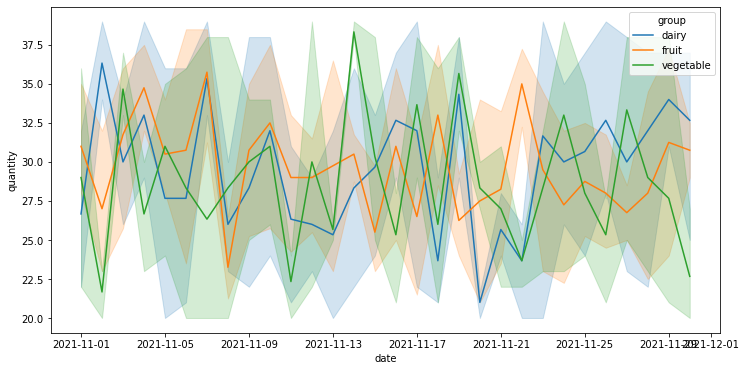

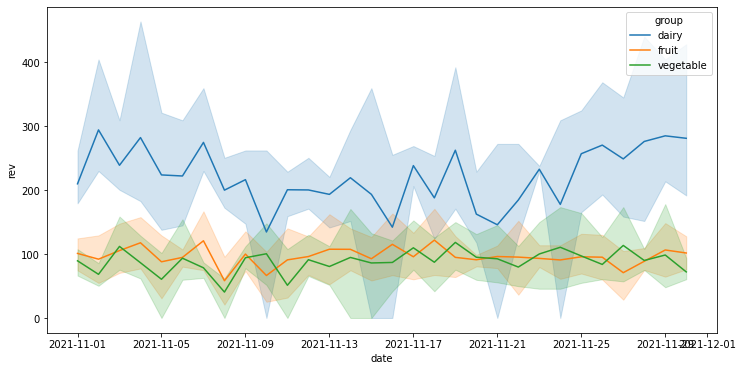

In [30]:
plt.figure(figsize = [12,6])
sns.lineplot(data = cnt, x = 'date', y = 'quantity', hue = 'group')
plt.show()
plt.figure(figsize = [12,6])
sns.lineplot(data = cnt, x = 'date', y = 'rev', hue = 'group')
plt.show()

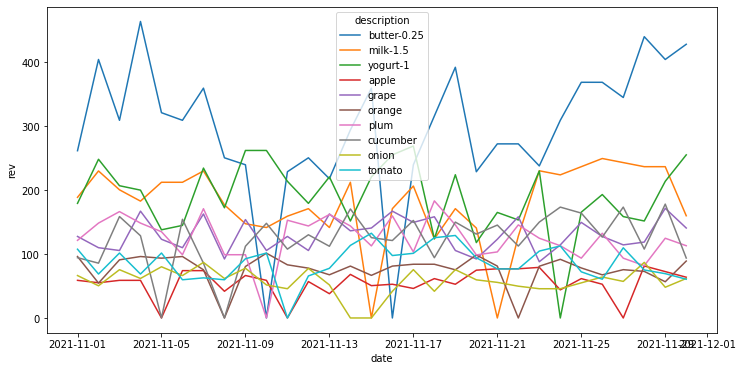

In [31]:
plt.figure(figsize = [12,6])
sns.lineplot(data = cnt, x = 'date', y = 'rev', hue = 'description')
plt.show()

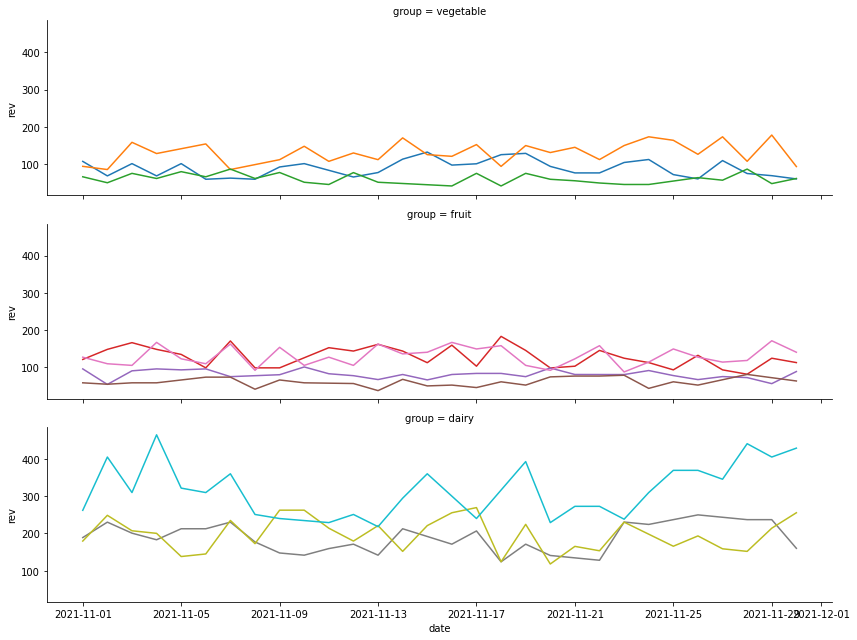

In [38]:
g = sns.FacetGrid(data = df, row = 'group', hue = 'description', aspect = 4)
g.map(sns.lineplot, 'date', 'rev')

# Iterator

In [39]:
names = np.random.choice(['koo', 'soe', 'doe'], 100, replace = True)

def get_values(names) :

  uniques, counts = np.unique(names, return_counts = True)
  unique = dict(zip(uniques, counts))

  res = list()

  for k, v in unique.items() :

    m1 = np.random.normal(50, 30, 1)
    s1 = np.random.normal(10, 10, 1)
    m2 = np.random.normal(1000, 300, 1)
    s2 = np.random.normal(100, 200, 1)

    score = [abs(a) if a<= 100 else 100 for a in np.random.normal(m1, abs(s1), v)]
    revenue = [abs(a) for a in np.random.normal(m2, abs(m2), v)]

    temp = pd.DataFrame({
        'name' : np.repeat(k, v),
        'score' : score, 'revenue' : revenue
    })

    res.append(temp)

  return pd.concat(res)

res = get_values(names)
res.head()

,name,score,revenue
0,doe,17.950971,30.186577
1,doe,37.609812,377.575831
2,doe,30.173879,499.253765
3,doe,36.708947,161.312668
4,doe,22.911067,711.161157


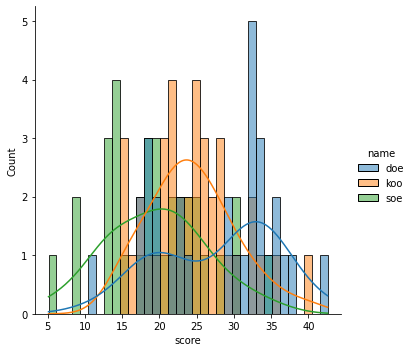

In [59]:
sns.displot(data = res.reset_index(), x = 'score', hue = 'name', kde = True, bins = 35)

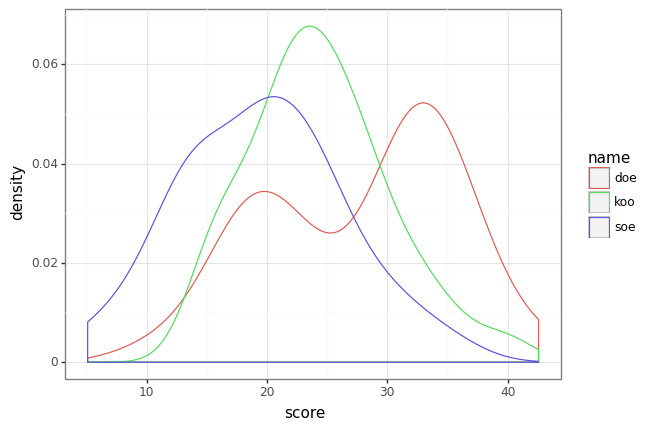

<ggplot: (8729023321801)>

In [61]:
(
    ggplot(res, aes('score', color = 'name')) +
    gg.geom_density() + 
    gg.theme_bw()
)

In [57]:
a = dict(res.groupby(['name'])['score'].apply(list))
res.groupby(['name'])['score'].apply(list).reset_index()

,name,score
0,doe,"[17.950971479397996, 37.609811849016616, 30.17..."
1,koo,"[15.214524127121145, 29.770370153702128, 17.83..."
2,soe,"[9.13550296807423, 17.784829906667138, 12.7100..."
